# IMDB Reviews Dataset

[IMDB Reviews dataset](https://www.tensorflow.org/datasets/catalog/imdb_reviews)

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Download the plain text dataset
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

In [3]:
# Get the train and test sets
train_data, test_data = imdb['train'], imdb['test']

# Initialize sentences and labels lists
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# Loop over all training examples and save the sentences and labels
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [4]:
# Parameters
vocab_size = 10000
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [5]:
import matplotlib.pyplot as plt

# Plot Utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

## Model 1: Flatten

In [6]:
# Parameters
embedding_dim = 16
dense_dim = 6

# Model Definition with a Flatten layer
model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_flatten.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_flatten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [7]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_flatten = model_flatten.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 1s 4ms/step - loss: 0.6011 - accuracy: 0.6679 - val_loss: 0.3913 - val_accuracy: 0.8331
Epoch 2/10
196/196 [==============================] - 1s 4ms/step - loss: 0.3097 - accuracy: 0.8722 - val_loss: 0.3375 - val_accuracy: 0.8528
Epoch 3/10
196/196 [==============================] - 1s 4ms/step - loss: 0.1954 - accuracy: 0.9322 - val_loss: 0.3674 - val_accuracy: 0.8435
Epoch 4/10
196/196 [==============================] - 1s 4ms/step - loss: 0.1101 - accuracy: 0.9723 - val_loss: 0.4000 - val_accuracy: 0.8376
Epoch 5/10
196/196 [==============================] - 1s 5ms/step - loss: 0.0505 - accuracy: 0.9930 - val_loss: 0.4492 - val_accuracy: 0.8317
Epoch 6/10
196/196 [==============================] - 1s 5ms/step - loss: 0.0229 - accuracy: 0.9984 - val_loss: 0.4862 - val_accuracy: 0.8320
Epoch 7/10
196/196 [==============================] - 1s 5ms/step - loss: 0.0113 - accuracy: 0.9995 - val_loss: 0.5244 - val_accuracy: 0.8306
Epoch 

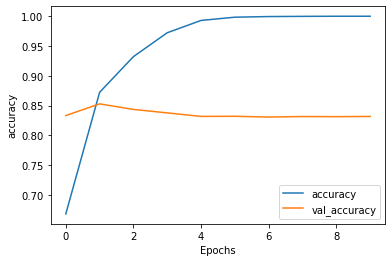

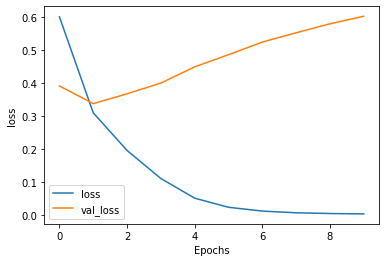

In [8]:
# Plot the accuracy and loss history
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

## LSTM

In [9]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [10]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 15s 65ms/step - loss: 0.5385 - accuracy: 0.7049 - val_loss: 0.3659 - val_accuracy: 0.8436
Epoch 2/10
196/196 [==============================] - 15s 77ms/step - loss: 0.3051 - accuracy: 0.8762 - val_loss: 0.3599 - val_accuracy: 0.8451
Epoch 3/10
196/196 [==============================] - 15s 77ms/step - loss: 0.2374 - accuracy: 0.9089 - val_loss: 0.3805 - val_accuracy: 0.8387
Epoch 4/10
196/196 [==============================] - 16s 82ms/step - loss: 0.2007 - accuracy: 0.9258 - val_loss: 0.4044 - val_accuracy: 0.8353
Epoch 5/10
196/196 [==============================] - 15s 76ms/step - loss: 0.1677 - accuracy: 0.9387 - val_loss: 0.4416 - val_accuracy: 0.8256
Epoch 6/10
196/196 [==============================] - 18s 90ms/step - loss: 0.1371 - accuracy: 0.9530 - val_loss: 0.5191 - val_accuracy: 0.8208
Epoch 7/10
196/196 [==============================] - 16s 79ms/step - loss: 0.1155 - accuracy: 0.9615 - val_loss: 0.5732 - val_accuracy:

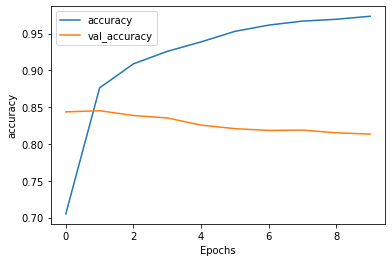

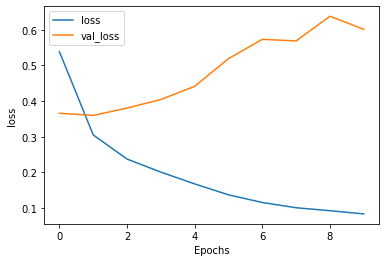

In [11]:
# Plot the accuracy and loss history
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

## GRU

*Gated Recurrent Unit* [GRU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU) is usually referred to as a simpler version of the LSTM. It can be used in applications where the sequence is important but you want faster results and can sacrifice some accuracy.

In [12]:
import tensorflow as tf

# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [13]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 15s 64ms/step - loss: 0.6431 - accuracy: 0.5978 - val_loss: 0.4455 - val_accuracy: 0.8186
Epoch 2/10
196/196 [==============================] - 11s 57ms/step - loss: 0.3791 - accuracy: 0.8427 - val_loss: 0.3566 - val_accuracy: 0.8474
Epoch 3/10
196/196 [==============================] - 12s 60ms/step - loss: 0.2772 - accuracy: 0.8875 - val_loss: 0.3655 - val_accuracy: 0.8432
Epoch 4/10
196/196 [==============================] - 12s 63ms/step - loss: 0.2250 - accuracy: 0.9157 - val_loss: 0.3832 - val_accuracy: 0.8420
Epoch 5/10
196/196 [==============================] - 12s 63ms/step - loss: 0.1961 - accuracy: 0.9291 - val_loss: 0.4377 - val_accuracy: 0.8210
Epoch 6/10
196/196 [==============================] - 14s 72ms/step - loss: 0.1637 - accuracy: 0.9410 - val_loss: 0.4553 - val_accuracy: 0.8317
Epoch 7/10
196/196 [==============================] - 15s 77ms/step - loss: 0.1395 - accuracy: 0.9520 - val_loss: 0.5065 - val_accuracy:

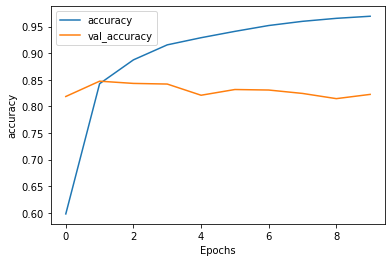

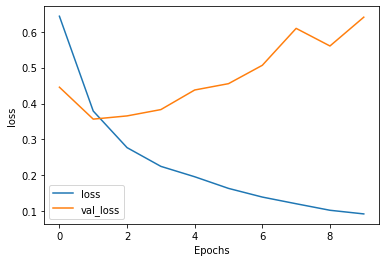

In [14]:
# Plot the accuracy and loss history
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

## Convolution

In [15]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
________________________________________________

In [16]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

# Train the model
history_conv = model_conv.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 6s 27ms/step - loss: 0.6133 - accuracy: 0.6757 - val_loss: 0.5062 - val_accuracy: 0.8360
Epoch 2/10
196/196 [==============================] - 5s 27ms/step - loss: 0.4547 - accuracy: 0.8641 - val_loss: 0.4603 - val_accuracy: 0.8478
Epoch 3/10
196/196 [==============================] - 5s 26ms/step - loss: 0.3821 - accuracy: 0.8941 - val_loss: 0.4476 - val_accuracy: 0.8419
Epoch 4/10
196/196 [==============================] - 5s 27ms/step - loss: 0.3314 - accuracy: 0.9134 - val_loss: 0.4520 - val_accuracy: 0.8219
Epoch 5/10
196/196 [==============================] - 5s 27ms/step - loss: 0.2910 - accuracy: 0.9273 - val_loss: 0.4750 - val_accuracy: 0.8338
Epoch 6/10
196/196 [==============================] - 5s 26ms/step - loss: 0.2583 - accuracy: 0.9365 - val_loss: 0.4888 - val_accuracy: 0.8270
Epoch 7/10
196/196 [==============================] - 5s 28ms/step - loss: 0.2287 - accuracy: 0.9459 - val_loss: 0.5233 - val_accuracy: 0.8246

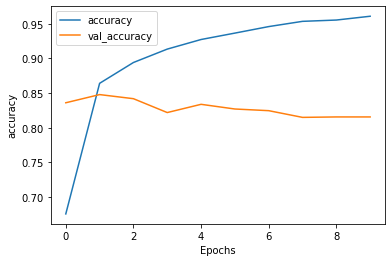

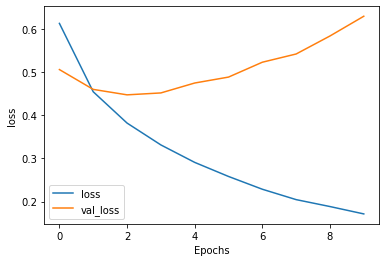

In [17]:
# Plot the accuracy and loss history
plot_graphs(history_conv, 'accuracy')
plot_graphs(history_conv, 'loss')